In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('housing.csv')

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Simple regression 

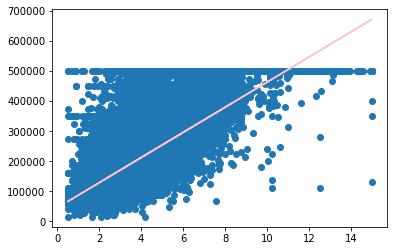

In [9]:
from sklearn.linear_model import LinearRegression

X = data[['median_income']]
y = data['median_house_value']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X.iloc[:, 0], y)
plt.plot(X.iloc[:, 0], model.predict(X), color='pink')
plt.show()


Multiple Regression 

In [10]:
from sklearn.linear_model import LinearRegression

X = data[['housing_median_age', 'total_rooms', 'population', 'median_income']]
y = data['median_house_value']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)


[ 1.98135830e+03  9.31412460e+00 -1.17027188e+01  4.12717074e+04]


more practice 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Simple Regression:
Coefficients: [41933.84939381]
Mean Squared Error: 7091157771.76555
R-squared: 0.45885918903846656


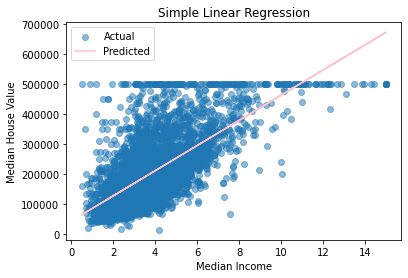

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Check for missing values
print(data.isnull().sum())

# Simple Linear Regression
X_simple = data[['median_income']]
y_simple = data['median_house_value']

# Train-Test Split for Simple Regression
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_simple_train)

# Predictions for Simple Regression
y_simple_pred = model_simple.predict(X_simple_test)

# Model Evaluation for Simple Regression
print('Simple Regression:')
print('Coefficients:', model_simple.coef_)
print('Mean Squared Error:', mean_squared_error(y_simple_test, y_simple_pred))
print('R-squared:', r2_score(y_simple_test, y_simple_pred))


# Plotting for Simple Regression
plt.scatter(X_simple_test.values, y_simple_test, label='Actual', alpha=0.5)
plt.plot(X_simple_test.values, y_simple_pred, color='pink', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()



In [16]:
# Multiple Linear Regression
X_multiple = data[['housing_median_age', 'total_rooms', 'population', 'median_income']]
y_multiple = data['median_house_value']

# Train-Test Split for Multiple Regression
X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_multiple_train, y_multiple_train)

# Predictions for Multiple Regression
y_multiple_pred = model_multiple.predict(X_multiple_test)

# Model Evaluation for Multiple Regression
print('\nMultiple Regression:')
print('Intercept:', model_multiple.intercept_)
print('Coefficients:', model_multiple.coef_)
print('Mean Squared Error:', mean_squared_error(y_multiple_test, y_multiple_pred))
print('R-squared:', r2_score(y_multiple_test, y_multiple_pred))


Multiple Regression:
Intercept: -18190.95473415067
Coefficients: [ 1.98675219e+03  9.54651153e+00 -1.21610108e+01  4.14025847e+04]
Mean Squared Error: 6535241756.165624
R-squared: 0.5012822817393567


In [17]:
#rashin farahani

In [18]:
ridge_model_multiple = Ridge(alpha=1.0)  # You can adjust the alpha parameter for the desired level of regularization
ridge_model_multiple.fit(X_multiple_train, y_multiple_train)

# Predictions for Multiple Regression
y_multiple_pred = ridge_model_multiple.predict(X_multiple_test)

# Model Evaluation for Multiple Regression
print('Ridge Regression (Multiple):')
print('Intercept:', ridge_model_multiple.intercept_)
print('Coefficients:', ridge_model_multiple.coef_)
print('Mean Squared Error:', mean_squared_error(y_multiple_test, y_multiple_pred))
print('R-squared:', r2_score(y_multiple_test, y_multiple_pred))

NameError: name 'Ridge' is not defined